# PYTHON SUPPORT VECTOR CLASSIFIER DEMO

#### TRAINING DATASET

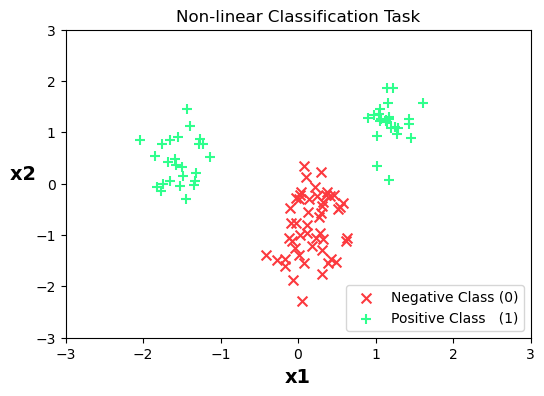

In [15]:
# Create Non-linear Binary Classification Task
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 100, n_features = 2, centers = 4, cluster_std = 1.2, random_state = 123)
y = y % 2

# Standardize Features X 
from sklearn.preprocessing import StandardScaler

X_train, y_train = StandardScaler().fit_transform(X), y

# Separate Samples
X_0 = X_train[y_train==0] # y=0 -> Red   -> Negative Class
X_1 = X_train[y_train==1] # y=1 -> Green -> Positive Class

# Plot Training Data
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Non-linear Classification Task')
plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1[:,0], X_1[:,1], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

### LINEAR SVC

θ0: [-0.28840341]
θ1, θ2: [[-0.91269737  2.36490627]]


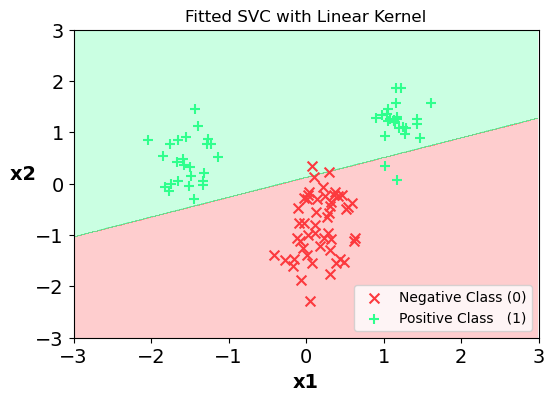

In [16]:
# Fit Linear SVC Model
# --- f(X) = θ0 + θ1x1 + θ2x2 ≥ 0 -> 1
#          = θ0 + θ1x1 + θ2x2 < 0 -> 0
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Print learned Model Coefficients
print('θ0:', model.intercept_)
print('θ1, θ2:', model.coef_)

# Create Meshgrid of x1, x2 Values
import numpy as np
x1 = np.arange(-3, 3, 0.01)
x2 = np.arange(-3, 3, 0.01)
xx1, xx2 = np.meshgrid(x1, x2)

# Evaluate f(X) on Grid
Z = model.predict(np.c_[xx1.flatten(), xx2.flatten()]).reshape(xx1.shape)

# Plot Decision Boundary
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Fitted SVC with Linear Kernel')
plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1[:,0], X_1[:,1], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

### KERNALIZED SVC

#### POLYNOMIAL KERNEL

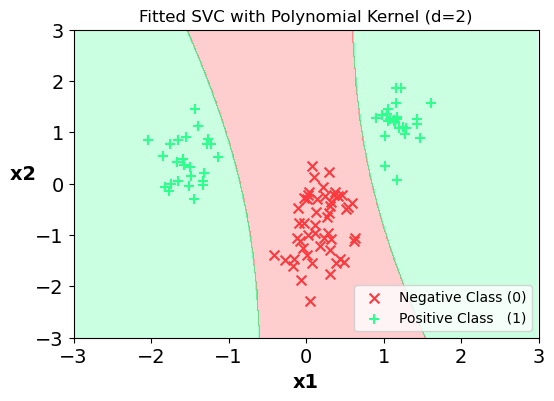

In [17]:
# Fit Kernelized SVC Model (with Polynomial Kernel)
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, C=1.0)
model.fit(X_train, y_train)

# Create Meshgrid of x1, x2 Values
import numpy as np
x1 = np.arange(-3, 3, 0.01)
x2 = np.arange(-3, 3, 0.01)
xx1, xx2 = np.meshgrid(x1, x2)

# Evaluate f(X) on Grid
Z = model.predict(np.c_[xx1.flatten(), xx2.flatten()]).reshape(xx1.shape)

# Plot Decision Boundary
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Fitted SVC with Polynomial Kernel (d=2)')
plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1[:,0], X_1[:,1], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#### RADIAL BASIS FUNCTION KERNEL 

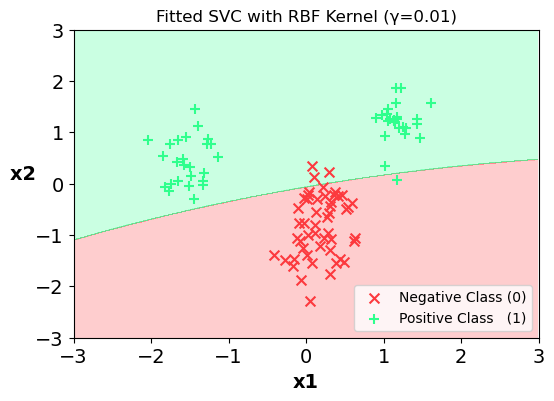

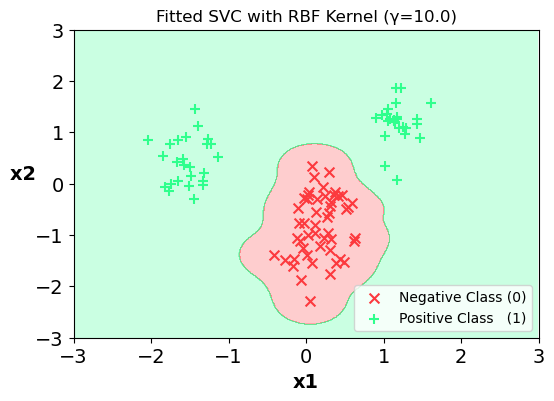

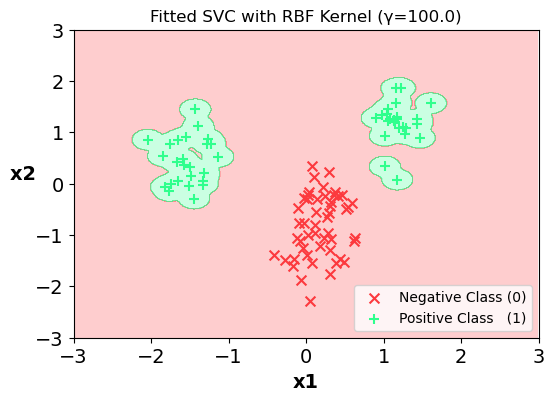

In [18]:
# Fit Kernalized SVM Model (with RBF Kernel)
from sklearn.svm import SVC

list_gamma = [0.01, 10.0, 100.0]

for value in list_gamma:
    model = SVC(kernel='rbf', gamma=value, C=1.0)
    model.fit(X_train, y_train)

    # Create Meshgrid of x1, x2 Values
    import numpy as np
    x1 = np.arange(-3, 3, 0.01)
    x2 = np.arange(-3, 3, 0.01)
    xx1, xx2 = np.meshgrid(x1, x2)

    # Evaluate f(X) on Grid
    Z = model.predict(np.c_[xx1.flatten(), xx2.flatten()]).reshape(xx1.shape)

    # Plot Decision Boundary
    %matplotlib inline

    import matplotlib.pyplot as plt
    import matplotlib.colors
    cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])
    
    plt.rcParams.update(plt.rcParamsDefault)
    plt.figure(figsize=(6,4))
    plt.title('Fitted SVC with RBF Kernel (γ=' + str(value) + ')')
    plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
    plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
    plt.scatter(X_1[:,0], X_1[:,1], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
    plt.legend(loc='lower right')
    plt.xlabel("x1",   fontsize=14, weight='bold')
    plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.show()